### Partie (1c): Résultats et résponses:

# Laboratoire 2
# Discrimination linéaire et réseaux de neurones profonds
## Classification et régression (FER et FG-NET)

### GTI771 - Apprentissage machine avancé
#### Département du génie logiciel et des technologies de l’information

#### Version 1.0 février 2020
#### <font color=blue> Version 2.0 - 17 février 2020 </font>
#### <font color=magenta> Version 3.0 - 2 mars 2020 </font>

##### Prof. Alessandro L. Koerich

| Étudiants             | Branavan Inthiranathan INTB25099502                                 |
|-----------------------|---------------------------------------------------------|
| Session               | HIV 2020                                            |
| Équipe                | 10                                                       |
| Numéro du laboratoire | 1                                                       |
| Professeur            | Prof. Alessandro L.Koerich                                               |
| Chargé de laboratoire | Alessandro L.Koerich                                                     |
| Date                  | 15 MARS 2020                                                    |

## Introduction

Ce deuxième laboratoire porte sur l'utilisation de trois algorithmes d'apprentissage soit les algorithmes de régression, les réseaux neuronaux et les réseaux neuronaux profonds. Dans ce laboratoire, vous êtes amenés à utiliser de nouvelles approches à l’aide de ces algorithmes aﬁn de résoudre deux problèmes: prédiction de l'âge de personnes à partir de photos du visage (régression); problème de classiﬁcation des expressions faciales (FER) introduit dans le cadre du premier laboratoire de ce cours.

Le problème de régression qui vous est présenté est le problème [Facial Aging Estimation (FAE)](https://yanweifu.github.io/FG_NET_data/index.html), dont le but est de predire l'âge des personnes à partir du visage. En vous basant sur les concepts vus en classe et l'expérience acquise dans le laboratoire 1, vous êtes invité à reprendre les primitives développées lors du laboratoire 1 ou d'autres primitives que vous jugez pertinentes à extraire sur ces types d’images et effectuer l’extraction de celles-ci sur l’ensemble de données fournies avec cet énoncé. 

##### Description de l'ensemble de données:
* 1002 images faciales de 82 sujets multiraciaux âgés de 0 à 69 ans;
* Déséquilibré: 50% des sujets ont entre 0 et 13 ans;
* Images couleur et niveaux de gris avec une dimension moyenne de 384x487 pixels, et la résolution varie de 200 dpi à 1200 dpi;
* Grande variation d'éclairage, de pose, d'expression faciale, de flou et d'occlusions (par exemple, moustache, barbe, lunettes, etc.).

Voici, en exemple, des images de visages se retrouvant dans l’ensemble de données FG-NET:

![Exemples de FER](https://www.mdpi.com/sensors/sensors-16-00994/article_deploy/html/images/sensors-16-00994-g001.png)

Veuillez noter que les images qui vous sont fournies ne sont pas nécessairement similaires aux images de FER. Plusieurs images comportent du bruit, des artéfacts ou des éléments non pertinents. Le défi de ce laboratoire repose sur cette difficulté qui est chose courante dans des problèmes d’apprentissage machine moderne.

Tout comme le premier travail pratique, vous réaliserez ce deuxième laboratoire avec la technologie Python3 conjointement avec la librairie d’apprentissage machine scikit-learn et TensorFlow et Keras pour la partie réseaux de neurones. Vous êtes invité à reprendre le code développé lors du laboratoire 1 afin de continuer son développement.

<font color=black> L’évaluation de ce laboratoire sera basée sur la qualité des modèles entraînes, la comparaison des performances réalisées par les différents modèles, les réponses aux questions dans cette notebook ainsi que l'organisation de votre code source (SVP, n'oubliez pas des commentaires dans le code!).</font>

* #### Partie 1: Régression
* Régression lineaire
* Régression Ridge
* Régression Lasso et Elastic-Net
* Descente du gradiente stochastique (SGD)
* Perceptron ??
* Primitives polynomiales et régression polynomiale ?? <br>
<br>
* #### Partie 2: Classification
* Régression logistique
* Réseaux de neurones MLP <br>
<br>
* #### Partie 3: Classification et régression
* Réseaux convolutionel entraîné "from scratch"
* Réseaux convolutionel + modèles pre-entraînes (transfer learning)
* Réseaux convolutionel adapté à la régression

## Partie 0: Imports

#### (1a) Import de bibliotèques



##### À faire:
1. Ajouter toutes les bibliothèques que vous avez utilisées pour compléter ce notebook dans une cellule avec une petite description.

In [0]:
import numpy
import pylab
import numpy as np  # package for scientific computing with Python.
import matplotlib.pyplot as plt # 2D plotting library
from sklearn.preprocessing import MinMaxScaler #Normalisation
from sklearn.model_selection import LeaveOneGroupOut #Define the LOSO
from sklearn.linear_model import LinearRegression #Regression lineaire
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge #Regression Ridge
from sklearn.linear_model import Lasso #Regression Lasso
from sklearn.linear_model import ElasticNet #Regression ElasticNet

from sklearn.linear_model import LogisticRegression #2b regression logistique
from sklearn.metrics import accuracy_score
from keras.utils import np_utils #2c keras np_utils

# Votre code ici

## Partie 1: Explorez les algorithmes de régression (FG-NET dataset)

Dans ce partie vous devez explorer le <b> algorithmes de régression lineaire </b> disponibles dans Scikit-learn, comme régression least square, régression Ridge, régression Lasso et Elastic-Net, descente du gradiente stochastique (SGD), etc.

Vouz devez comparer la performance de ces algorithmes pour l'ensemble FG-NET sur:

#### 1) Le vecteur de pixels (images vectorisés)
#### 2) Vecteur de primitives (reprendre les primitives du lab 1)
#### 3) Vecteur de primitives selectionés/transformés (reprendre les primitives du lab 1)


### (1a) Charger le fichier de données

In [0]:
# Load data
X_fgnet_48 = np.loadtxt('fgnet_48x48.csv', delimiter=',', dtype=int)
X_fgnet_256 = np.loadtxt('fgnet_256x256.csv', delimiter=',', dtype=int)
Y_fgnet_subject = np.loadtxt('fgnet_subjects.csv', delimiter=',', dtype=int) #Le numero du sujet
Y_fgnet_age = np.loadtxt('fgnet_labels.csv', delimiter=',', dtype=int) #label de l'ag


#mis en commentaire pour essayer l'exemple du prof
#X_fgnet_48 = X_fgnet_48.reshape(X_fgnet_48.shape[0],1,48,48).astype('uint8')
#X_fgnet_256  = X_fgnet_256.reshape(X_fgnet_256.shape[0], 1, 256, 256).astype('uint8')

### <font color=black> (1b) Visualisation des visages </font>

Pensez-vous qui c'est necessaire un pre-traitement des images? Si oui, 
[Pre-processing](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)


Voici deux sources pour vous aidez à décider:
- http://eprints.qut.edu.au/92300/1/manuscript_Jhony.pdf
- https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7475805

In [0]:
# Normalize the input data
scaler = MinMaxScaler()
scaler.fit(X_fgnet_48)
X_fgnet_48 = scaler.transform(X_fgnet_48)
scaler.fit(X_fgnet_256)
X_fgnet_256 = scaler.transform(X_fgnet_256)

### (1c) Statistiques sur les sujets et étiquettes

##### À faire:
1. Calculer quelques statistiques (# images par sujet, distribuition des âges, etc.) que vous jugez importantes sur les données
2. Faire une analyse des résultats et présenter vos conclusions basés sur ces statistiques.

### Partie (1c): Code:

In [0]:
def getListNbImageBySubject():
    listNbImage= [0] * (np.amax(Y_fgnet_subject)+1)
    for subject in Y_fgnet_subject:
        listNbImage[subject]+=1
    return listNbImage

def getListAgeByImage():
    listAge = [0] * (np.amax(Y_fgnet_age)+1)
    for age in Y_fgnet_age:
        listAge[age]+=1
    return listAge
    # Code exemple:
# Histogramme des étiquettes
#hist, _ = np.histogram(ytrain, density=False, bins=7, range=(0, 7))

### Partie (1c): Résultats et résponses:

In [0]:
print("Nombre d'image par sujet")
listNbImage = getListNbImageBySubject()
print(listNbImage)
print("Moyenne d'image pour un sujet " + str(np.mean(listNbImage)))
print("L'écart-type d'image pour un sujet " + str(np.std(listNbImage)))

print("Distribution des images par l'âge")
listAge = getListAgeByImage()
print(listAge)
print("Moyenne d'image pour l'âge " + str(np.mean(listAge)))
print("Médiane d'image de l'âge " + str(np.median(listAge)))
print("Écart-type d'image pour l'âge " + str(np.std(listAge)))
# Plot du histogramme

#import matplotlib.pyplot as plt

Nombre d'image par sujet
[0, 15, 16, 12, 12, 11, 12, 9, 15, 13, 12, 14, 15, 12, 10, 13, 13, 13, 11, 10, 13, 12, 13, 12, 11, 12, 11, 11, 11, 13, 11, 13, 12, 11, 13, 14, 13, 12, 14, 14, 14, 10, 13, 11, 10, 13, 13, 14, 16, 10, 8, 11, 11, 13, 13, 8, 8, 10, 11, 9, 12, 13, 12, 10, 6, 15, 12, 10, 10, 11, 11, 13, 14, 16, 16, 10, 18, 16, 16, 14, 14, 12, 11]
Moyenne d'image pour un sujet 12.072289156626505
L'écart-type d'image pour un sujet 2.5067769953348966
Distribution des images par l'âge
[43, 27, 39, 42, 42, 40, 41, 41, 31, 25, 40, 33, 37, 32, 32, 30, 37, 28, 47, 23, 20, 16, 17, 22, 9, 17, 11, 11, 12, 9, 19, 6, 4, 9, 8, 11, 8, 3, 5, 6, 9, 6, 5, 4, 4, 7, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 0, 0, 1, 0, 1, 3, 1, 1, 0, 0, 0, 1, 0, 1]
Moyenne d'image pour l'âge 14.314285714285715
Médiane d'image de l'âge 8.0
Écart-type d'image pour l'âge 14.69260538710628


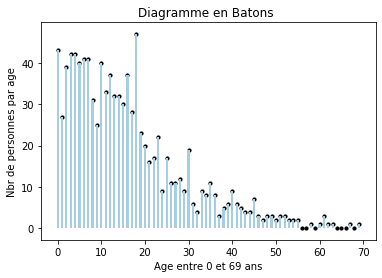

In [0]:
#Tracer le diagramme à batons 
Effectifs=listAge
fig = plt.figure()
x = [i for i in range(70)]
width = 0.5
plt.bar(x, Effectifs, width, color=(0.65098041296005249, 0.80784314870834351, 0.89019608497619629, 1.0)  )
plt.scatter([i for i in x],Effectifs,color='k',s=10)
#plt.grid()
plt.ylabel('Nbr de personnes par age')
plt.xlabel('Age entre 0 et 69 ans')
plt.title('Diagramme en Batons ')
#pylab.xticks(x,['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'],rotation=40)
plt.show()

### (1d) Créer et évaluer des modèles de régression

##### À faire:
1. Choisir au moins quatre (4) algorithmes de régression lineaire disponibles dans Scikit-learn, comme régression least square, régression Ridge, régression Lasso, régression Elastic-Net, descente du gradiente stochastique (SGD), etc.
2. Entraîner et optimiser les paramètres des modèles si necessaire. Utiliser le protocol <font color=blue> "Leave One Subject Out Cross-Validation" </font> (LOSO).
4. Faire une analyse des résultats et présenter vos conclusions sur les modèles de régression.

| Algorithme            | Paramètres                |  MSE  |  MAE  |
|-----------------------|---------------------------|-------|-------|
| Regr lineaire         | aucun                     |179.22 | 11.56 |
| Regr Ridge            | alpha = 100               |44.20  | 6.09  |
| Regr Lasso            | alpha = 0.05              | 46.30 | 6.16  |
| Regr ElasticNet       | alpha = 0.05, l1_ratio=0.5| 47.35 | 6.26  |

Pour chaque modèle de régression créé et évalué dans cette partie, on utilise le protocole LOSO pour faire du cross-validation. L’entrainement pour chaque algorithme est fait avec 82 modèles qui sont le nombre total de sujets dans notre dataset afin d’avoir des datasplits. Le premier modèle de régression est avec LinearRegression, cette régression ajuste le modèle linéaire des coefficients de poids pour minimiser le résidu de la somme des carrés entre cibles observées et prédites, la meansquarederror est 179.22 et la meanabsoluteerror est 11.56 pour faire les prédictions. Le deuxième modèle de régression est avec Ridgeregression, cette régression règle certains problèmes du Ordinary Least Squares en mettant une pénalité sur la grandeur des coefficients avec la régularisation L2, avec un alpha de 100, notre MSE est de 44.20 et la MAE est 6.09. Le troisième modèle de régression est avec Lasso, cette régression estime les coefficients clairsemés avec la régularisation L1 pour résoudre la minimisation des pénalités de leastsquares, en choisissant un alpha de 0.05, notre MSE est de 46.30 et la MAE est 6.16. Le quatrième modèle de régression est avec Elastic-Net, cette régression prend les régularisations L1 et L2 pour les coefficients, avec un alpha de 0.05 et un L1-ratio de 0.5, notre MSE est de 47.35 et la MAE de 6.26. Pour ce qui est de l’utilisation des quatre modèles entrainés, les algorithmes Ridge, Lasso et ElasticNet montre des résultats moins élevés pour les erreurs et sont préférables à l’algorithme de régression linéaire ordinaire.

### Partie (1d): Code:

In [0]:
# Create n subjects data splits, where n is the total number of subjects in the dataset, 
# 82 in our case
loso = LeaveOneGroupOut()
loso.get_n_splits(X_fgnet_48, Y_fgnet_age, Y_fgnet_subject)

82

In [0]:
def regressionModel(model_R):
  index = 0
  acc   = np.zeros( 82 )
  for train_index, test_index in loso.split(X_fgnet_48, Y_fgnet_age, Y_fgnet_subject):
      X_train, X_test = X_fgnet_48[train_index], X_fgnet_48[test_index]
      Y_train, Y_test = Y_fgnet_age[train_index], Y_fgnet_age[test_index]
      
      # Train the model on X_train, Y_train 
      model = model_R.fit( X_train, Y_train )
      
      # Use the learned model to predict on X_test ,Y_test 
      Y_test_pred      = model.predict( X_test )
      
      # The coefficients
      print('Coefficients: \n', model.coef_)
      # The mean squared error
      print('MSE: %.2f' % mean_squared_error(Y_test, Y_test_pred) )
      print('MAE: %.2f' % mean_absolute_error(Y_test, Y_test_pred) )
          
      acc[index] =  mean_absolute_error(Y_test, Y_test_pred)
      
      index += 1
  return acc

### Partie (1d): Résultats et résponses:

In [0]:
#Regression Lineaire
model_LR = LinearRegression()
acc = regressionModel(model_LR)
print(acc)
# Average MAE
print(acc.mean())

Coefficients: 
 [-0.42787108 -3.02072711 -2.61449176 ... -3.62500572  5.82728599
  4.75662451]
MSE: 528.62
MAE: 19.16
Coefficients: 
 [ 0.55800857 -3.19781159 -3.00076643 ... -3.87986929  6.39309079
  4.84566778]
MSE: 356.13
MAE: 14.92
Coefficients: 
 [ 2.21923063 -2.22712859 -1.84897307 ... -4.93009234  6.04806456
  6.70403003]
MSE: 811.05
MAE: 23.73
Coefficients: 
 [ 1.41651267 -4.16581607 -4.30129574 ... -3.6257435   5.57053957
  3.79793652]
MSE: 1063.63
MAE: 26.28
Coefficients: 
 [ 0.24589746 -4.3522487  -2.55039574 ... -3.25843533  7.1218563
  5.79529805]
MSE: 635.88
MAE: 21.79
Coefficients: 
 [-0.05998827 -3.46405901 -2.1636577  ... -4.40841575  7.17757522
  6.44934193]
MSE: 487.17
MAE: 17.48
Coefficients: 
 [ 0.09486351 -4.20631885 -3.11497722 ... -3.4888178   6.87796782
  5.95479766]
MSE: 232.39
MAE: 12.95
Coefficients: 
 [ 1.18747272 -2.58143207 -3.05639517 ... -4.34214889  7.58654163
  5.2861925 ]
MSE: 208.18
MAE: 12.79
Coefficients: 
 [-0.32478503 -1.70461367 -3.14208353 ...

In [0]:
model_Ridge = Ridge(alpha = 100)
acc = regressionModel(model_Ridge)
print(acc)
# Average MAE
print(acc.mean())

Coefficients: 
 [-0.34760504 -0.11175615 -0.27744989 ... -0.2970932   0.10225336
  0.02503198]
MSE: 171.97
MAE: 10.95
Coefficients: 
 [-0.31998054 -0.11075963 -0.29117938 ... -0.34720732  0.04683242
 -0.01270471]
MSE: 77.67
MAE: 6.76
Coefficients: 
 [-0.26715492 -0.06562505 -0.28029539 ... -0.34580642  0.03348674
 -0.00646022]
MSE: 686.77
MAE: 21.34
Coefficients: 
 [-0.3193565  -0.11947787 -0.29814905 ... -0.29477062  0.09407227
  0.03620316]
MSE: 472.61
MAE: 16.40
Coefficients: 
 [-0.30836496 -0.1059766  -0.2727272  ... -0.25051836  0.17380303
  0.13059322]
MSE: 511.56
MAE: 18.80
Coefficients: 
 [-0.29923973 -0.144733   -0.27456019 ... -0.39922771  0.05676376
 -0.01030247]
MSE: 527.72
MAE: 18.98
Coefficients: 
 [-0.32542028 -0.09616387 -0.27740512 ... -0.30921584  0.08441777
  0.05454971]
MSE: 269.89
MAE: 14.18
Coefficients: 
 [-0.34385257 -0.12286525 -0.2888083  ... -0.32941587  0.101763
  0.04392996]
MSE: 114.06
MAE: 8.76
Coefficients: 
 [-0.31592292 -0.11811797 -0.29969537 ... -0.3

In [0]:
model_Lasso = Lasso(alpha = 0.2)
acc = regressionModel(model_Lasso)
print(acc)
# Average MAE
print(acc.mean())

Coefficients: 
 [-0. -0. -0. ... -0. -0. -0.]
MSE: 172.43
MAE: 10.15
Coefficients: 
 [-0. -0. -0. ... -0. -0. -0.]
MSE: 85.31
MAE: 7.22
Coefficients: 
 [-0. -0. -0. ... -0. -0. -0.]
MSE: 784.73
MAE: 23.30
Coefficients: 
 [-0.  0. -0. ... -0. -0. -0.]
MSE: 545.94
MAE: 19.24
Coefficients: 
 [-0. -0. -0. ... -0. -0. -0.]
MSE: 650.17
MAE: 23.15
Coefficients: 
 [-0. -0. -0. ... -0. -0. -0.]
MSE: 818.75
MAE: 25.66
Coefficients: 
 [-0. -0. -0. ... -0. -0. -0.]
MSE: 297.75
MAE: 14.62
Coefficients: 
 [-0. -0. -0. ... -0. -0. -0.]
MSE: 135.59
MAE: 9.51
Coefficients: 
 [-0. -0. -0. ... -0. -0. -0.]
MSE: 34.90
MAE: 4.82
Coefficients: 
 [-0. -0. -0. ... -0. -0. -0.]
MSE: 44.58
MAE: 5.32
Coefficients: 
 [-0. -0. -0. ... -0. -0. -0.]
MSE: 106.31
MAE: 8.25
Coefficients: 
 [-0. -0. -0. ... -0. -0. -0.]
MSE: 110.75
MAE: 9.42
Coefficients: 
 [-0. -0. -0. ... -0. -0. -0.]
MSE: 139.60
MAE: 8.69
Coefficients: 
 [-0. -0. -0. ... -0. -0. -0.]
MSE: 250.43
MAE: 12.61
Coefficients: 
 [-0. -0. -0. ... -0. -0. -0.

In [0]:
model_ElasticNet = ElasticNet(alpha = 0.1, l1_ratio=0.5)
acc = regressionModel(model_ElasticNet)
print(acc)
# Average MAE
print(acc.mean())

Coefficients: 
 [-0.         -0.         -0.         ... -0.15959247 -0.
 -0.        ]
MSE: 162.64
MAE: 10.02
Coefficients: 
 [-0.         -0.         -0.         ... -0.28262415 -0.
 -0.        ]
MSE: 72.91
MAE: 6.69
Coefficients: 
 [-0.          0.         -0.         ... -0.24639398 -0.
 -0.        ]
MSE: 697.22
MAE: 21.71
Coefficients: 
 [-0.          0.         -0.         ... -0.15360886 -0.
 -0.        ]
MSE: 476.07
MAE: 16.60
Coefficients: 
 [-0.         -0.         -0.         ... -0.06072001 -0.
 -0.        ]
MSE: 543.70
MAE: 19.99
Coefficients: 
 [-0.         -0.         -0.         ... -0.42595064 -0.
 -0.        ]
MSE: 609.00
MAE: 21.16
Coefficients: 
 [-0.          0.         -0.         ... -0.21401053 -0.
 -0.        ]
MSE: 267.30
MAE: 14.01
Coefficients: 
 [-0.         -0.         -0.         ... -0.20975839 -0.
 -0.        ]
MSE: 112.83
MAE: 9.01
Coefficients: 
 [-0.         -0.         -0.         ... -0.19370569 -0.
 -0.        ]
MSE: 29.84
MAE: 4.62
Coefficients: 


## Partie 2: Explorez les algorithmes de classification (FER dataset)

Vous devez reprendre l'ensemble FER et les primitives que vouz avez choisi dans le laboratoire 1.

Dans ce partie vous devez explorer le algorithmes de classification <b> régression logistique et réseaux de neurones multicouches (MLP) </b>

Vouz devez comparer la performance de ces algorithmes pour l'ensemble FER sur:


#### 1) Le vecteur de pixels (images vectorisés)
#### 2) Vecteur de primitives (reprendre les primitives du lab 1)
#### 3) Vecteur de primitives selectionés/transformés (reprendre les primitives du lab 1)

### <font color=blue> (2a) Charger le fichier de données</font> 

In [0]:
# Load data
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load data
ferData = np.loadtxt('fer2013.csv', delimiter=',', dtype=np.str)
Xtrain = np.ones((28709,2304),np.uint8)
for i in range(1, 28710):
	Xtrain[i-1]=ferData[i,1].split(" ")

ytrain=ferData[1:28710,0].astype(np.int)
Xval = np.ones((3589,2304),float)
for i in range(28710, 32299):
	Xval[i-28710]=ferData[i,1].split(" ")

yval=ferData[28710:32299,0].astype(np.int)
Xtest = np.ones((3589,2304),float)
for i in range(32299, 35888):
	Xtest[i-32299]=ferData[i,1].split(" ")

ytest=ferData[32299:,0].astype(np.int)

OSError: ignored

#### Charger vector 2 (SIFT et LBP)

In [0]:
#LBP
lbp_vector_app = numpy.genfromtxt('lbp_vector_app.csv', delimiter=';')
lbp_vector_app_x = lbp_vector_app[:,:-1]#Prendre les features(x)

lbp_vector_val = numpy.genfromtxt('lbp_vector_val.csv', delimiter=';')
lbp_vector_val_x = lbp_vector_val[:,:-1]#Prendre les features(x)

lbp_vector_test = numpy.genfromtxt('lbp_vector_test.csv', delimiter=';')
lbp_vector_test_x = lbp_vector_test[:,:-1]#Prendre les features(x)

#SIFT
sift_vector_app = numpy.genfromtxt('sift_vector_app.csv', delimiter=';')
sift_vector_app_x = sift_vector_app[:,:-1]#Prendre les features(x)

sift_vector_val = numpy.genfromtxt('sift_vector_val.csv', delimiter=';')
sift_vector_val_x = sift_vector_val[:,:-1]#Prendre les features(x)

sift_vector_test = numpy.genfromtxt('sift_vector_test.csv', delimiter=';')
sift_vector_test_x = sift_vector_test[:,:-1]#Prendre les features(x)

#### Charger vector 3 ( Filter univariate Variance Threhold & PCA )



In [0]:
"""Filter Univariate Variance Threhold  """ 
#LBP
FS_th_lbp_vector_app = numpy.genfromtxt('FS_th_lbp_vector_app.csv', delimiter=';')
FS_th_lbp_vector_val = numpy.genfromtxt('FS_th_lbp_vector_val.csv', delimiter=';')
FS_th_lbp_vector_test = numpy.genfromtxt('FS_th_lbp_vector_test.csv', delimiter=';')

#SIFT
FS_th_sift_vector_app = numpy.genfromtxt('FS_th_sift_vector_app.csv', delimiter=';')
FS_th_sift_vector_val = numpy.genfromtxt('FS_th_sift_vector_val.csv', delimiter=';')
FS_th_sift_vector_test = numpy.genfromtxt('FS_th_sift_vector_test.csv', delimiter=';')

In [0]:
"""PCA"""
#SIFT
PCA_sift_vector_app = numpy.genfromtxt('PCA_sift_vector_app.csv', delimiter=';')
PCA_sift_vector_val = numpy.genfromtxt('PCA_sift_vector_val.csv', delimiter=';')
PCA_sift_vector_test = numpy.genfromtxt('PCA_sift_vector_test.csv', delimiter=';')

#LBP
PCA_lbp_vector_app = numpy.genfromtxt('PCA_lbp_vector_app.csv', delimiter=';')
PCA_lbp_vector_val = numpy.genfromtxt('PCA_lbp_vector_val.csv', delimiter=';')
PCA_lbp_vector_test = numpy.genfromtxt('PCA_lbp_vector_test.csv', delimiter=';')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

### Normaliser 



In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))

Normalizer FER

In [0]:
Xtrain = scaler.fit_transform(Xtrain)
Xval = scaler.fit_transform(Xval)
Xtest = scaler.fit_transform(Xtest)

Normalize Vector 2

In [0]:
lbp_vector_app_x = scaler.fit_transform(lbp_vector_app_x)
lbp_vector_val_x = scaler.fit_transform(lbp_vector_val_x)
lbp_vector_test_x = scaler.fit_transform(lbp_vector_test_x)

sift_vector_app_x = scaler.fit_transform(sift_vector_app_x)
sift_vector_val_x = scaler.fit_transform(sift_vector_val_x)
sift_vector_test_x = scaler.fit_transform(sift_vector_test_x)

Nomalize vector 3

In [0]:
"""Filter Univariate Variance Threhold  """ 
FS_th_lbp_vector_app = scaler.fit_transform(FS_th_lbp_vector_app)
FS_th_lbp_vector_val = scaler.fit_transform(FS_th_lbp_vector_val)
FS_th_lbp_vector_test = scaler.fit_transform(FS_th_lbp_vector_test)

FS_th_sift_vector_app = scaler.fit_transform(FS_th_sift_vector_app)
FS_th_sift_vector_val = scaler.fit_transform(FS_th_sift_vector_val)
FS_th_sift_vector_test = scaler.fit_transform(FS_th_sift_vector_test)

In [0]:
"""PCA"""
PCA_lbp_vector_app = scaler.fit_transform(PCA_lbp_vector_app)
PCA_lbp_vector_val = scaler.fit_transform(PCA_lbp_vector_val)
PCA_lbp_vector_test = scaler.fit_transform(PCA_lbp_vector_test)

PCA_sift_vector_app = scaler.fit_transform(PCA_sift_vector_app)
PCA_sift_vector_val = scaler.fit_transform(PCA_sift_vector_val)
PCA_sift_vector_test = scaler.fit_transform(PCA_sift_vector_test)

### <font color=blue> (2b) Créer et évaluer des modèles de classification (Régression logistique) </font>

<font color=blue>
    
##### À faire:

1. Utiliser l'algorithme régression logistique disponible dans [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), pour classifier les trois (3) vecteurs de primitives du laboratoire 1. Vous pouvez regarder aussi [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier) et [LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV)
2. Entraîner et optimiser les paramètres des modèles.
3. Faire une analyse des résultats et présenter vos conclusions sur les modèles linéaires.
    
</font>

###  (2b): Code:

In [0]:
# instantiate the model (using the default parameters)
def showResultatLogisticRegr(logreg, train, val, test):
    y_pred=logreg.predict(train)
    print('% Error of logistic regression classifier on train set: {:.2f}'.format(1 - accuracy_score(y_pred, ytrain)))

    y_pred=logreg.predict(val)
    print('% Error of logistic regression classifier on validation set: {:.2f}'.format(1 - accuracy_score(y_pred, yval)))

    y_pred=logreg.predict(test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test, ytest)))
    print('% Error of logistic regression classifier on test set: {:.2f}'.format(1 - accuracy_score(y_pred, ytest)))

Vecteur FER


In [0]:
# instantiate the model (using the default parameters) fit the model with data
logreg = LogisticRegression().fit(Xtrain,ytrain)

In [0]:
#resultat pour vecteur FER
showResultatLogisticRegr(logreg,Xtrain,Xval,Xtest)

Vecteur 2 

SIFT

In [0]:
# instantiate the model (using the default parameters) fit the model with data
logreg_sift = LogisticRegression().fit(sift_vector_app_x,ytrain)

In [0]:
#resultat pour vecteur SIFT
showResultatLogisticRegr(logreg_sift,sift_vector_app_x,sift_vector_val_x,sift_vector_test_x)

LBP

In [0]:
# instantiate the model (using the default parameters) fit the model with data
logreg_lbp = LogisticRegression().fit(lbp_vector_app_x, ytrain)

In [0]:
#resultat pour vecteur LBP
showResultatLogisticRegr(logreg_lbp,lbp_vector_app_x,lbp_vector_val_x,lbp_vector_test_x)

Vecteur 3





PCA (SIFT/LBP)


In [0]:
"SIFT"
# instantiate the model (using the default parameters) fit the model with data
logreg_sift_PCA = LogisticRegression().fit(PCA_sift_vector_app, ytrain)

In [0]:
showResultatLogisticRegr(logreg_sift_PCA,PCA_sift_vector_app,PCA_sift_vector_val,PCA_sift_vector_test)

In [0]:
"LBP"
# instantiate the model (using the default parameters) fit the model with data
logreg_lbp_PCA = LogisticRegression().fit(PCA_lbp_vector_app, ytrain)

In [0]:
showResultatLogisticRegr(logreg_lbp_PCA,PCA_lbp_vector_app_x,PCA_lbp_vector_val_x,PCA_lbp_vector_test_x)

Filter Univariate Variance Threhold


In [0]:
"SIFT"
# instantiate the model (using the default parameters) fit the model with data
logreg_sift_F = LogisticRegression().fit(FS_th_sift_vector_app, ytrain)


In [0]:
showResultatLogisticRegr(logreg_sift_F,FS_th_sift_vector_app,FS_th_sift_vector_val,FS_th_sift_vector_test)

In [0]:
"LBP"
# instantiate the model (using the default parameters) fit the model with data
logreg_lbp_F = LogisticRegression().fit(FS_th_lbp_vector_app, ytrain)

In [0]:
showResultatLogisticRegr(logreg_lbp_F,FS_th_lbp_vector_app,FS_th_lbp_vector_val,FS_th_lbp_vector_test)

###  (2b): Résultats et résponses:


| Algorithme       | Paramètres    | Precision | %Erreur App | %Erreur Val | %Erreur Tst | 
|------------------|---------------|-----------|-------------|-------------|-------------|
| Regr logistique  | V1-FER        |   0.36  |   51    |   64    |   64    |
| Regr logistique  | V2-SIFT       |   0.25    |   74        |   75    |   75    |
| Regr logistique  | V2-LBP        |   0.27  |   73    |   74    |   73    |
| Regr logistique  | V3-PCA-SIFT   |   0.24 |    75    |   75    |   76    |
| Regr logistique  | V3-PCA_LBP    |   0.24  |   75    |   75    |   76    |
| Regr logistique  | V3-F-SIFT     |   0.25  |    74    |   75    |   75    |
| Regr logistique  | V3-F-LBP      |   0.27  |    74    |   73    |   73    |

###Analyse des résultats###
Avec l'utilisation de l'ensemble FER et les primitives du laboratoire 1. Cela donne sept ensembles différents, soit le vecteur de pixels, les deux vecteurs de primitives de PCA et de LBP et les deux vecteurs de primitives avec l'application de l'algorithme de feature selection et les deux vecteurs de primitives avec l'algorithme de transformation. Après avoir effectué l'algorithme de classification sur les différents vecteurs soit la régression logistique, on peut voir que les modèles linéaires obtenus ont des résultats assez similaires, soit les ensembles avec les primitives LBP, SIFT, PCA sur SIFT, PCA sur LBP, Filtre sur SIFT et Filtre sur LBP dont les précisions obtenues sont de 24% et 27% avec l'erreur sur l'ensemble entrainement, validation et test sont entre 73% et 76% ce qui est très rapproché. Sauf pour un seul cas, le vecteur de pixels(images vectorisées) a un pourcentage d'erreur de 51% sur l'ensemble d'entrainement et 64% sur la partie validation et test, qui est environ 10% de moins que tous les autres modèles entrainés.


### <font color=blue> (2c) Créer et évaluer des modèles de classification (Réseaux perceptron multi-couche)</font>

<font color=blue>
    
##### À faire:

1. Utiliser [Tensorflow et Keras](https://www.tensorflow.org/tutorials/keras/classification) pour construire un réseau de neurones multi-couche pour classifier les trois
(3) vecteurs de primitives du laboratoire 1. 
2. Choisir l'architecture approprié pour chaque vecteur de primitives (nombre et dimension des couches). 
2. Entraîner et optimiser les paramètres des réseaux.
4. Faire une analyse des résultats et présenter vos conclusions sur les réseaux de neurones.
    
</font>

### <font color=blue> (2c) Code</font>

### One-Hot-Encode Outputs (Labels)

In [0]:
ytrain = np_utils.to_categorical(ytrain)
yval   = np_utils.to_categorical(yval)
ytest  = np_utils.to_categorical(ytest)
num_classes = ytest.shape[1]

### Configure Tensor Flow and Keras

In [0]:
print(tf.version.VERSION)

with tf.compat.v1.Session() as sess:
  devices = sess.list_devices()
devices

os.environ["CUDA_VISIBLE_DEVICES"]="0"
config = tf.compat.v1.ConfigProto( )
config.gpu_options.allow_growth = True
sess   =  tf.compat.v1.Session(config=config)

import keras.backend.tensorflow_backend as tf_bkend
tf.compat.v1.keras.backend.set_session(sess)

### Create a MLP Model

In [0]:
def mlp_model(x_train):
    
    from keras.layers      import Input, Dense, Flatten
    from keras.layers.core import Dropout
    from keras.models      import Model
    from keras             import initializers, optimizers, regularizers
    from keras.callbacks   import ModelCheckpoint
    
    from keras.layers.normalization import BatchNormalization
        
    import keras.initializers as init
    
    nb_classes = 7
    
    inp    = Input(shape = x_train[0].shape)
    #----------------------
    dense1 = Dense(512, activation='relu', name="dense1_512")(inp)
    norm1  = BatchNormalization()(dense1)
    #----------------------
    dense2 = Dense(128, activation='relu', name="dense2_128")(norm1)
    drop1  = Dropout(0.50)(dense2)    
    #----------------------
    out    = Dense(nb_classes, activation='softmax')(drop1)
    #----------------------

    model  = Model(inp, out)

#   model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'] )
    
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = optimizers.Adadelta( lr = 1.0, rho = 0.95, epsilon = 1e-08, decay = 0.0),
                  metrics = ['accuracy'] )
    
    model.summary()
     
    return model 

### Build a model

In [0]:
from keras.callbacks import ModelCheckpoint
from livelossplot    import PlotLossesKeras
from keras           import optimizers

model = mlp_model(Xtrain)

model_sift = mlp_model(sift_vector_app_x)
model_lbp = mlp_model(lbp_vector_app_x)
model_sift_PCA=mlp_model(PCA_sift_vector_app)
model_sift_FS_th=mlp_model(FS_th_sift_vector_app)
model_lbp_PCA=mlp_model(PCA_lbp_vector_app)
model_lbp_FS_th=mlp_model(FS_th_lbp_vector_app)


In [0]:
str2 = ".best.hdf5"

filepath = "weights_FER_512_128" + str2
filepath_sift= "weights_FER_sift" + str2
filepath_lbp= "weights_FER_lbp" + str2
filepath_sift_pca= "weights_FER_sift_pca"+ str2
filepath_sift_fs= "weights_FER_sift_fs" + str2
filepath_lbp_pca=  "weights_FER_lbp_pca" + str2
filepath_lbp_fs= "weights_FER_lbp_fs" + str2

In [0]:
from keras.callbacks import ModelCheckpoint
from livelossplot    import PlotLossesKeras
from keras           import optimizers


def  create_callback_list(filepath_to_use):
    checkpoint = ModelCheckpoint( filepath_to_use, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max' ) 

    callbacks_list = [ checkpoint, PlotLossesKeras() ]
    return callbacks_list

### Train the model

In [0]:
hist        = []
nb_epoch    = 20
batch_size  = 10000

Train FER

In [0]:
train_steps = Xtrain.shape[0]//batch_size 
val_steps   = Xval.shape[0]//batch_size 

#fitting the model 
hist.append(model.fit(Xtrain, ytrain,
                      batch_size = batch_size, 
                      epochs = nb_epoch,
                      verbose = 1,
                      shuffle = True,
                      callbacks =  create_callback_list(filepath),
                      validation_data = (Xval, yval)
                     ))

Train Vector 2

SIFT

In [0]:
train_steps = sift_vector_app_x.shape[0]//batch_size 
val_steps   = sift_vector_val_x.shape[0]//batch_size 

#fitting the model 
hist.append(model_sift.fit(sift_vector_app_x, ytrain,
                      batch_size = batch_size, 
                      epochs = nb_epoch,
                      verbose = 1,
                      shuffle = True,
                      callbacks =  create_callback_list(filepath_sift),
                      validation_data = (sift_vector_val_x, yval)
                     ))

LBP

In [0]:
train_steps = lbp_vector_app_x.shape[0]//batch_size 
val_steps   = lbp_vector_val_x.shape[0]//batch_size 

#fitting the model 
hist.append(model_lbp.fit(lbp_vector_app_x, ytrain,
                      batch_size = batch_size, 
                      epochs = nb_epoch,
                      verbose = 1,
                      shuffle = True,
                      callbacks =  create_callback_list(filepath_lbp),
                      validation_data = (lbp_vector_val_x, yval)
                     ))

### PCA

PCA SIFT

In [0]:
train_steps = PCA_sift_vector_app.shape[0]//batch_size 
val_steps   = PCA_sift_vector_val.shape[0]//batch_size 

#fitting the model 
hist.append(model_sift_PCA.fit(PCA_sift_vector_app, ytrain,
                      batch_size = batch_size, 
                      epochs = nb_epoch,
                      verbose = 1,
                      shuffle = True,
                      callbacks = create_callback_list(filepath_sift_pca),
                      validation_data = (PCA_sift_vector_val, yval)
                     ))


In [0]:
train_steps = PCA_lbp_vector_app.shape[0]//batch_size 
val_steps   = PCA_lbp_vector_val.shape[0]//batch_size 

#fitting the model 
hist.append(model_lbp_PCA.fit(PCA_lbp_vector_app, ytrain,
                      batch_size = batch_size, 
                      epochs = nb_epoch,
                      verbose = 1,
                      shuffle = True,
                      callbacks = create_callback_list(filepath_lbp_pca),
                      validation_data = (PCA_lbp_vector_val, yval)
                     ))

### Filter Univariate Variance Threhold

SIFT

In [0]:
train_steps = FS_th_sift_vector_app.shape[0]//batch_size 
val_steps   = FS_th_sift_vector_val.shape[0]//batch_size 

#fitting the model 
hist.append(model_sift_FS_th.fit(FS_th_sift_vector_app, ytrain,
                      batch_size = batch_size, 
                      epochs = nb_epoch,
                      verbose = 1,
                      shuffle = True,
                      callbacks = create_callback_list(filepath_lbp_pca),
                      validation_data = (FS_th_sift_vector_val, yval)
                     ))

LBP

In [0]:
train_steps = FS_th_lbp_vector_app.shape[0]//batch_size 
val_steps   =FS_th_lbp_vector_app.shape[0]//batch_size 

#fitting the model 
hist.append(model_lbp_FS_th.fit(FS_th_lbp_vector_app, ytrain,
                      batch_size = batch_size, 
                      epochs = nb_epoch,
                      verbose = 1,
                      shuffle = True,
                      callbacks = create_callback_list(filepath_lbp_pca),
                      validation_data = (FS_th_lbp_vector_val, yval)
                     ))

### Evaluate the model

In [0]:
# instantiate the model (using the default parameters)
def showResultatmodel(model, train, val, test):
    y_pred=model.evaluate(train, ytrain)
    
    print(' Error of logistic regression classifier on train set: {:.2f} %'.format(100 - y_pred[1]*100))

    y_pred=model.evaluate(val, yval)
    print(' Error of logistic regression classifier on validation set: {:.2f} %'.format(100 - y_pred[1]*100))

    y_pred=model.evaluate(test, ytest)
    print('Accuracy of logistic regression classifier on test set: {:.2f} %'.format(scores[1]*100))
    print('Error of logistic regression classifier on test set: {:.2f} %'.format(100 - y_pred[1]*100))

Evaluate FER

In [0]:
# Final evaluation of the model
scores = model.evaluate(Xtest, ytest, verbose=0)
print("FER MLP accuracy: %.2f%%" % (scores[1]*100))
showResultatmodel(model, Xtrain, Xval,  Xtest)

Evaluate vector 2

Evaluate SIFT

In [0]:
# Final evaluation of the model
scores = model_sift.evaluate(sift_vector_test_x, ytest, verbose=0)
print("SIFT MLP accuracy: %.2f%%" % (scores[1]*100))
showResultatmodel(model_sift, sift_vector_app_x,sift_vector_val_x,sift_vector_test_x)

Evaluate LBP

In [0]:
# Final evaluation of the model
scores = model_lbp.evaluate(lbp_vector_test_x, ytest, verbose=0)
print("LBP MLP accuracy: %.2f%%" % (scores[1]*100))
showResultatmodel(model_lbp, lbp_vector_app_x,lbp_vector_val_x,lbp_vector_test_x)

Evaluate vector 3


Filter Univariate Variance Threhold  


In [0]:
# Final evaluation of the model#
#SIFT# 
scores = model_sift_FS_th.evaluate(FS_th_sift_vector_test, ytest, verbose=0)
print("Filter SIFT MLP accuracy: %.2f%%" % (scores[1]*100))
showResultatmodel(model_sift_FS_th, FS_th_sift_vector_app,FS_th_sift_vector_val,FS_th_sift_vector_test)

#lbp
scores = model_lbp_FS_th.evaluate(Fs_th_lbp_vector_test, ytest, verbose=0)
print("Filter LBP MLP accuracy: %.2f%%" % (scores[1]*100))
showResultatmodel(model_lbp_FS_th, FS_th_lbp_vector_app,FS_th_lbp_vector_val,FS_th_lbp_vector_test)

PCA

In [0]:
# Final evaluation of the model#
#SIFT# 
scores = model_sift_PCA.evaluate(PCA_sift_vector_test, ytest, verbose=0)
print("PCA SIFT MLP accuracy: %.2f%%" % (scores[1]*100))
showResultatmodel(model_sift_PCA, PCA_sift_vector_app,PCA_sift_vector_val,PCA_sift_vector_test)

#lbp
scores = model_lbp_PCA.evaluate(PCA_lbp_vector_test, ytest, verbose=0)
print("PCA LBP MLP accuracy: %.2f%%" % (scores[1]*100))
showResultatmodel(model_lbp_PCA, PCA_lbp_vector_app,PCA_lbp_vector_val,PCA_lbp_vector_test)

### (2c): Résultats et résponses:

| Algorithme       | Paramètres    | Precision | %Erreur App | %Erreur Val | %Erreur Tst | 
|------------------|---------------|-----------|-------------|-------------|-------------|
| MLP FER      | 0:1180160:2048:65664:0:903        |   29.09  |   70.42    |   69.74    |   70.91    |
| MLP SIFT     | 0:66048:2048:65664:0:903 |   14.57  |   86.00    |   87.02    |   85.43    |
| MLP LBP      | 0:13824:2048:65664:0:903        |   13.18  |   83.67    |   83.76    |   86.82    |
| MLP F SIFT   | 0:1536:2048:65664:0:903       |   17.86  |   84.53    |   82.25    |   82.14    |
| MLP F LBP    | 0:25088:2048:65664:0:903         |   14.71  |   85.74    |   86.15    |   85.29    |
| MLP PCA SIFT | 0:1536:2048:65664:0:903        |   13.43  |   88.87    |   84.90    |   86.47    |
| MLP PCA LBP  | 0:13824:2048:65664:0:903         |   24.49  |   74.89    |   75.06    |   75.51    |

###Analyse des résultats###
Avec l'utilisation de l'ensemble FER et les primitives du laboratoire 1. Cela donne sept ensembles différents, soit le vecteur de pixels, les deux vecteurs de primitives de PCA et de LBP et les deux vecteurs de primitives avec l'application de l'algorithme de feature selection et les deux vecteurs de primitives avec l'algorithme de transformation. Après avoir utilisé Tensorflow et Keras pour construire un réseau de neurones multicouche pour effectuer la classification des primitives du laboratoire 1. On peut observer selon les résultats des différents vecteurs dans les modèles MLP que la précision de ces réseaux de neurones est sensiblement la même, en effet avec les ensembles LBP, SIFT, PCA sur SIFT, PCA sur LBP, Filtre sur SIFT, ils ont données entre 13% et 17% sur la précision avec comme pourcentage d'erreur sur l'ensemble d'entrainement, de validation et test entre 82% et 86%. Par contre, le modèle entrainé avec le vecteur de pixels(images vectorisées) obtient un meilleur résultat avec une précision de 5% à 15% plus élevé que les autres soit 29.09% et un pourcentage d'erreur de 5% à 15% moins élevé avec les autres modèles, soit 70.42% avec l'ensemble d'entrainement, 69.74% pour l'ensemble de validation et 70.91% pour l'ensemble de test. De plus second modèle entrainé avec le vecteur de primitives LBP avec l'algorithme de transformation qui donne une précision de 24.49% et un pourcentage d'erreur de 74.89% avec l'ensemble d'entrainement, 75.06% pour l'ensemble de validation et 75.51% pour l'ensemble de test.



## Partie 3: Explorez l'apprentissage de la représentation et les réseaux neuronaux profonds (FER dataset et FG-NET dataset)


<font color=black>
    
##### À faire :
1. Utiliser [Tensorflow et Keras](https://www.tensorflow.org/tutorials/keras/classification) pour construire un réseau de neurones convolutif pour apprendre une représentation directement des images de visage aussi que les discriminantes. 
2. Choisir l’architecture appropriée : nombre de couches convolutifs (CL), dimension des filtres, “stride”, nombre de couches entièrement connectées (FC) et la dimension des couches). 
3. Entraîner et optimiser les paramètres du réseau.
4. Évaluer la pertinence d’utiliser "data augmentation" pour améliorer la généralisation.
5. Récupérer une des architectures CNN pré-entraînes disponibles dans Keras pour faire une “transfert de connaissance (transfer learning). Faire un "fine-tuning" du modèle choisi sur FER.    
7. Choisir le modèle qu’a donné de meilleurs résultats sur FER et l’adapter pour FG-NET.     
8. Faire une analyse des résultats et présenter vos conclusions sur les réseaux de neurones.
    
</font>

<font color=black>
    
### Partie (3a): Code CNN (FER):
    
##### À faire:
1. Utiliser [Tensorflow et Keras](https://www.tensorflow.org/tutorials/keras/classification) pour construire un réseau de neurones convolutif pour apprendre une représentation directement des images de visage aussi que les discriminantes. 
2. Choisir l’architecture appropriée: nombre de couches convolutifs (CL), dimension des filtres, "stride”, nombre de couches entièrement connectées (FC) et la dimension des couches). 
3. Entraîner et optimiser les paramètres du réseau.
4. Évaluer la pertinence d’utiliser "data augmentation" pour améliorer la généralisation.
    
</font>

In [0]:
# Votre code ici
from sklearn.preprocessing import MinMaxScaler

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import math
import tensorflow as tf
from tensorflow import keras

### Fetch data, normalize, reshape and output labels in OHE

In [0]:
# Load data
# Load data
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load data
ferData = np.loadtxt('fer2013.csv/fer2013.csv', delimiter=',', dtype=np.str)
Xtrain = np.ones((28709,2304),np.uint8)
for i in range(1, 28710):
	Xtrain[i-1]=ferData[i,1].split(" ")

ytrain=ferData[1:28710,0].astype(np.int)
Xval = np.ones((3589,2304),float)
for i in range(28710, 32299):
	Xval[i-28710]=ferData[i,1].split(" ")

yval=ferData[28710:32299,0].astype(np.int)
Xtest = np.ones((3589,2304),float)
for i in range(32299, 35888):
	Xtest[i-32299]=ferData[i,1].split(" ")

ytest=ferData[32299:,0].astype(np.int)

# normalize
scaler = MinMaxScaler(feature_range=(0, 1))

Xtrain = scaler.fit_transform(Xtrain)
Xval   = scaler.fit_transform(Xval)
Xtest  = scaler.fit_transform(Xtest)

# reshape to be [samples][pixels][width][height]
Xtrain = Xtrain.reshape(Xtrain.shape[0], 48, 48, 1).astype('float32')
Xtest  = Xtest.reshape(Xtest.shape[0], 48, 48, 1).astype('float32')
Xval   = Xval.reshape(Xval.shape[0], 48, 48, 1).astype('float32')

# Multinomial distribution
from keras.utils import np_utils

ytrain = np_utils.to_categorical(ytrain)
yval   = np_utils.to_categorical(yval)
ytest  = np_utils.to_categorical(ytest)

num_classes = ytest.shape[1]

### Configure TensorFlow and Keras

In [0]:
print(tf.version.VERSION)


with tf.compat.v1.Session() as sess:
  devices = sess.list_devices()
devices

#Use "0" if you have a GPU card
os.environ["CUDA_VISIBLE_DEVICES"]="0"
config = tf.compat.v1.ConfigProto( )
config.gpu_options.allow_growth = True
sess   =  tf.compat.v1.Session(config=config)

import keras.backend.tensorflow_backend as tf_bkend
tf.compat.v1.keras.backend.set_session(sess)

from keras import backend as K
K.set_image_data_format('channels_last')

### CNN with 2 CLs and 2 FCs

In [0]:
def fer_cnn_model(): 

    from keras.layers      import Input, Dense, Flatten, Conv2D, MaxPool2D, Flatten
    from keras.layers.core import Dropout
    from keras.models      import Model
    from keras             import initializers, optimizers, regularizers
    from keras.callbacks   import ModelCheckpoint
    from keras.layers.normalization import BatchNormalization
    import keras.initializers as init
    
    nb_classes = 7
    
    inp    = Input(shape = Xtrain[0].shape, name="input" )
    #----------------------
    conv1  = Conv2D(filters = 16, kernel_size = (2, 2), strides=(1, 1),
                    name="conv1", padding="same", activation = 'relu')(inp)
    norm1  = BatchNormalization(name="bn1")(conv1)
    #----------------------
    conv2  = Conv2D(filters = 16, kernel_size = (2, 2), strides=(1, 1),
                    name="conv2", padding="same", activation = 'relu')(norm1)
    norm2  = BatchNormalization(name="bn2")(conv2)
    #----------------------
    pool2  = MaxPool2D(pool_size = (2, 2), strides = 2, name="mp1")(norm2)
    #----------------------              
    flat   = Flatten(name="flat")(pool2)
    #----------------------    
    dense1 = Dense(128, activation='relu', name="dense1_128")(flat)
    drop1  = Dropout(0.30, name="dp0.3" )(dense1)    
    #----------------------    
    dense2 = Dense(64, activation='relu', name="dense2_64")(drop1)
    drop2  = Dropout(0.20, name="dp0.2" )(dense2)        
    #----------------------
    out    = Dense(nb_classes, activation='softmax', name="output" )(drop2)
    #----------------------

    model  = Model(inp, out)

    # model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'] )
    
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = optimizers.Adadelta(lr = 1.0,
                                                  rho = 0.95,
                                                  epsilon = 1e-08,
                                                  decay = 0.0),
                  metrics = ['accuracy'] )
    
    model.summary()
    
    return model

In [0]:
Xtrain[0].shape

###  CNN with 5 CLs and 2 FCs

In [0]:
def fer_cnn_model2():
    
    from keras.layers      import Input, Dense, Conv2D, MaxPool2D, Flatten
    from keras.layers.core import Dropout
    from keras.models      import Model
    from keras             import initializers, optimizers, regularizers
    from keras.callbacks   import ModelCheckpoint
    
    from keras.layers.normalization import BatchNormalization
        
    import keras.initializers as init
    
    nb_classes = 7
    
    inp    = Input( shape = Xtrain[0].shape, name="input" )
    #inp    = Input( shape=(0,2304), name="input" )
    #----------------------
    conv1  = Conv2D(filters = 64, kernel_size = (2, 2), strides=(1, 1), name="conv1", padding="same", activation = 'relu')(inp)
    norm1  = BatchNormalization(name="bn1")(conv1)
    #----------------------
    conv2  = Conv2D(filters = 64, kernel_size = (2, 2), strides=(1, 1), name="conv2", padding="same", activation = 'relu')(norm1)
    norm2  = BatchNormalization(name="bn2")(conv2)
    #----------------------
    pool2  = MaxPool2D(pool_size = (2, 2), strides = 2, name="mp1")(norm2)
    #----------------------
    conv3  = Conv2D(filters = 128, kernel_size = (3, 3), strides=(1, 1), name="conv3", padding="same", activation = 'relu')(pool2)
    norm3  = BatchNormalization(name="bn3")(conv3)
    conv4  = Conv2D(filters = 128, kernel_size = (3, 3), strides=(1, 1), name="conv4", padding="same", activation = 'relu')(norm3)
    norm4  = BatchNormalization(name="bn4")(conv4)
    conv5  = Conv2D(filters = 128, kernel_size = (3, 3), strides=(1, 1), name="conv5", padding="same", activation = 'relu')(norm4)
    norm5  = BatchNormalization(name="bn5")(conv5)
    #----------------------
    pool6  = MaxPool2D(pool_size = (2, 2), strides = 2, name="mp2")(norm5)
    #----------------------              
    flat   = Flatten(name="flat")(pool6)
    norm7  = BatchNormalization(name="bn7")(flat)
    #----------------------    
    dense1 = Dense(1024, activation='relu', name="dense1_1024")(norm7)
    drop1  = Dropout(0.30, name="dp0.3")(dense1)    
    #----------------------    
    dense2 = Dense(512, activation='relu', name="dense2_512")(drop1)
    drop2  = Dropout(0.20, name="dp0.2")(dense2)        
    #----------------------
    out    = Dense(nb_classes, activation='softmax', name="output" )(drop2)
    #----------------------

    model  = Model(inp, out)
    
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = optimizers.Adadelta(lr = 1.0,
                                                  rho = 0.95,
                                                  epsilon = 1e-08,
                                                  decay = 0.0),
                  metrics = ['accuracy'] )
    
    model.summary()
    
    return model

### CNN with 7 CLs and 2 FCs 



In [0]:
def fer_cnn_model4():
    from keras.layers      import Input, Dense, Conv2D, MaxPool2D, Flatten
    from keras.layers.core import Dropout
    from keras.models      import Model
    from keras             import initializers, regularizers
    from keras.callbacks   import ModelCheckpoint
    import keras.optimizers as optimizers 
    
    from keras.layers.normalization import BatchNormalization
        
    import keras.initializers as init
    
    nb_classes = 7
    
    inp    = Input( shape = Xtrain[0].shape, name="input" )
    #inp    = Input( shape=(0,2304), name="input" )
    #----------------------
    conv1  = Conv2D(filters = 64, kernel_size = (2, 2), strides=(1, 1), name="conv1", padding="same", activation = 'relu')(inp)
    norm1  = BatchNormalization(name="bn1")(conv1)
    #----------------------
    conv2  = Conv2D(filters = 64, kernel_size = (2, 2), strides=(1, 1), name="conv2", padding="same", activation = 'relu')(norm1)
    norm2  = BatchNormalization(name="bn2")(conv2)
    #----------------------
    pool2  = MaxPool2D(pool_size = (2, 2), strides = 2, name="mp1")(norm2)
    #----------------------
    conv3  = Conv2D(filters = 128, kernel_size = (3, 3), strides=(1, 1), name="conv3", padding="same", activation = 'relu')(pool2)
    norm3  = BatchNormalization(name="bn3")(conv3)
    conv4  = Conv2D(filters = 128, kernel_size = (3, 3), strides=(1, 1), name="conv4", padding="same", activation = 'relu')(norm3)
    norm4  = BatchNormalization(name="bn4")(conv4)
    conv5  = Conv2D(filters = 128, kernel_size = (3, 3), strides=(1, 1), name="conv5", padding="same", activation = 'relu')(norm4)
    norm5  = BatchNormalization(name="bn5")(conv5)
    #----------------------
    pool6  = MaxPool2D(pool_size = (2, 2), strides = 2, name="mp2")(norm5)
    #----------------------              
    conv6  = Conv2D(filters = 256, kernel_size = (3, 3), strides=(1, 1), name="conv6", padding="same", activation = 'relu')(pool6)
    norm6  = BatchNormalization(name="bn6")(conv6)
    conv7  = Conv2D(filters = 256, kernel_size = (3, 3), strides=(1, 1), name="conv7", padding="same", activation = 'relu')(norm6)
    norm7  = BatchNormalization(name="bn7")(conv7)
    #----------------------
    pool7 =  MaxPool2D(pool_size = (2, 2), strides = 2, name="mp3")(norm7)
    #----------------------
    flat   = Flatten(name="flat")(pool7)
    norm8  = BatchNormalization(name="bn8")(flat)
    #----------------------    
    dense1 = Dense(1024, activation='relu', name="dense1_1024")(norm8)
    drop1  = Dropout(0.30, name="dp0.3")(dense1)    
    #----------------------    
    dense2 = Dense(512, activation='relu', name="dense2_512")(drop1)
    drop2  = Dropout(0.20, name="dp0.2")(dense2)        
    #----------------------
    out    = Dense(nb_classes, activation='softmax', name="output" )(drop2)
    #----------------------

    model  = Model(inp, out)
    
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = optimizers.Adadelta(lr = 1.0,
                                                  rho = 0.95,
                                                  epsilon = 1e-08,
                                                  decay = 0.0),
                  metrics = ['acc'] )
    
    model.summary()
    
    return model

#### CNN with 3 CLs and 2 FCs

In [0]:
def fer_cnn_model3():
    
    from keras.layers      import Input, Dense, Conv2D, MaxPool2D, Flatten
    from keras.layers.core import Dropout
    from keras.models      import Model
    from keras             import initializers, regularizers
    from keras.callbacks   import ModelCheckpoint
    import keras.optimizers as optimizers 
    
    from keras.layers.normalization import BatchNormalization
        
    import keras.initializers as init
    
    nb_classes = 7
    
    inp    = Input( shape = Xtrain[0].shape, name="input" )
    #inp    = Input( shape=(0,2304), name="input" )
    #----------------------
    conv1  = Conv2D(filters = 64, kernel_size = (2, 2), strides=(1, 1), name="conv1", padding="same", activation = 'relu')(inp)
    norm1  = BatchNormalization(name="bn1")(conv1)
    #----------------------
    conv2  = Conv2D(filters = 64, kernel_size = (2, 2), strides=(1, 1), name="conv2", padding="same", activation = 'relu')(norm1)
    norm2  = BatchNormalization(name="bn2")(conv2)
    #----------------------
    pool2  = MaxPool2D(pool_size = (2, 2), strides = 2, name="mp1")(norm2)
    #----------------------
    conv3  = Conv2D(filters = 128, kernel_size = (3, 3), strides=(1, 1), name="conv3", padding="same", activation = 'relu')(pool2)
    norm3  = BatchNormalization(name="bn3")(conv3)
    conv4  = Conv2D(filters = 128, kernel_size = (3, 3), strides=(1, 1), name="conv4", padding="same", activation = 'relu')(norm3)
    norm4  = BatchNormalization(name="bn4")(conv4)
    #----------------------
    pool6  = MaxPool2D(pool_size = (2, 2), strides = 2, name="mp2")(norm4)
    #----------------------              
    flat   = Flatten(name="flat")(pool6)
    norm7  = BatchNormalization(name="bn7")(flat)
    #----------------------    
    dense1 = Dense(1024, activation='relu', name="dense1_1024")(norm7)
    drop1  = Dropout(0.40, name="dp0.4")(dense1)    
    #----------------------    
    dense2 = Dense(512, activation='relu', name="dense2_512")(drop1)
    drop2  = Dropout(0.20, name="dp0.2")(dense2)        
    #----------------------
    out    = Dense(nb_classes, activation='softmax', name="output" )(drop2)
    #----------------------

    model  = Model(inp, out)
    
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = optimizers.Adadelta(lr = 1.0,
                                                  rho = 0.95,
                                                  epsilon = 1e-08,
                                                  decay = 0.0),
                  metrics = ['accuracy'] )
    
    model.summary()
    
    return model

### Build model 

In [0]:
from tensorflow.python.keras.callbacks import ModelCheckpoint
from livelossplot    import PlotLossesKeras
from tensorflow.python.keras           import optimizers
from keras.callbacks import EarlyStopping
import tensorflow as tf

Choose which model to train

In [0]:
model = fer_cnn_model()
str1 = "weights_FER_CNN_2CL_128_64" 

# model = fer_cnn_model2()
# str1 = "weights_FER_CNN_5CL_1028_512"

# model = fer_cnn_model3()
# str1 = "weights_FER_CNN_3CL"

# model = fer_cnn_model4()
# str1 = "weights_FER_CNN_7CL"

In [0]:

str2 = ".best.hdf5"

filepath = str1+str2 

print(filepath)

# setting Early Stop
early_stop = EarlyStopping(monitor='val_loss',
                              patience=18)

checkpoint_acc = ModelCheckpoint( filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max' ) 

checkpoint_loss = ModelCheckpoint( filepath, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min' ) 

callbacks_list = [checkpoint_acc, PlotLossesKeras(), early_stop]

### Train Model

Without Data Augmentation

In [0]:
hist        = []
nb_epoch    = 100
batch_size  = 80
train_steps = Xtrain.shape[0]//batch_size 
val_steps   = Xval.shape[0]//batch_size 

#fitting the model 
hist.append(model.fit(Xtrain, ytrain,
                      batch_size = batch_size, 
                      epochs = nb_epoch,
                      verbose = 1,
                      shuffle = True,
                      callbacks = callbacks_list,
                      validation_data = (Xval, yval)
                     ))

With Data Augmentation

In [0]:
# Data Generator
from keras.preprocessing.image import ImageDataGenerator

batch_size  = 80

train_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08,
                               shear_range=0.3, height_shift_range=0.08,
                               zoom_range=0.08)

train_generator = train_gen.flow( Xtrain, ytrain, batch_size = batch_size )

In [0]:
hist        = []
nb_epoch    = 500
train_steps = Xtrain.shape[0]//batch_size 
val_steps   = Xval.shape[0]//batch_size 

#fitting the model 
hist.append(model.fit_generator( train_generator,
                                epochs = nb_epoch,
                                steps_per_epoch = train_steps,
                                verbose = 1,
                                shuffle = True,
                                callbacks = callbacks_list,
                                validation_data = (Xval, yval)))

Evaluate the best model

In [0]:
model = fer_cnn_model()
# model = fer_cnn_model2()
# model = fer_cnn_model3()
# model = fer_cnn_model4()

# Re-generating the model 
model.load_weights(filepath)

In [0]:
# Final evaluation of the model
scores_tra = model.evaluate(Xtrain, ytrain, verbose = 0)
scores_val = model.evaluate(Xval, yval, verbose = 0)
scores_tst = model.evaluate(Xtest, ytest, verbose = 0)
print("FER CNN accuracy on training set  : %.2f%%" % (scores_tra[1]*100))
print("FER CNN accuracy on validation set: %.2f%%" % (scores_val[1]*100))
print("FER CNN accuracy on test set      : %.2f%%" % (scores_tst[1]*100))

### Partie (3a): Résultats et résponses:

#### Vos résultats ici:

##### Model1 :

| Ensemble | Taux de classification correct |                               
|----------|--------------------------------|
| App      | 96.3  %                        |                   
| Val      | 50.13 %                        |                             
| Test     | 50.68 %                        | 

#####  Model1 - Data Augmentation

 | Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 66.75  %                         |                   
 | Val      | 54.81 %                        |                             
 | Test     | 56.20 %                         | 

#####  Model2 

 | Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 96.3  %                         |                   
 | Val      | 50.13 %                        |                             
 | Test     | 50.68 %                         |  

#####  Model2 - Data Augmentation

| Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 89.10 %                        |                   
 | Val      | 67.7 %                         |                             
 | Test     | 68.3%                          |  

#####  Model3 

 | Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 99.75%                         |                   
 | Val      | 58.62%                         |                             
 | Test     | 59.85%                         |  

#####  Model3 - Data Augmentation

 | Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 80.64%                         |                   
 | Val      | 62.64%                         |                             
 | Test     | 63.61%                         |  


##### Model1 :

| Ensemble | Taux de classification correct |                               
|----------|--------------------------------|
| App      | 96.3  %                        |                   
| Val      | 50.13 %                        |                             
| Test     | 50.68 %                        | 

#####  Model1 - Data Augmentation

 | Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 66.75  %                         |                   
 | Val      | 54.81 %                        |                             
 | Test     | 56.20 %                         | 

#####  Model2 

 | Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 96.3  %                         |                   
 | Val      | 50.13 %                        |                             
 | Test     | 50.68 %                         |  

#####  Model2 - Data Augmentation

| Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 89.10 %                        |                   
 | Val      | 67.7 %                         |                             
 | Test     | 68.3%                          |  

#####  Model3 

 | Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 99.75%                         |                   
 | Val      | 58.62%                         |                             
 | Test     | 59.85%                         |  

#####  Model3 - Data Augmentation

 | Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 80.64%                         |                   
 | Val      | 62.64%                         |                             
 | Test     | 63.61%                         |   

           
#####  Model4 

 | Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 99.32%                         |                   
 | Val      | 62.36%                         |                             
 | Test     | 63.11%                         |   

           
#####  Model4 - Data Augmentation

 | Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 98.8%                          |                   
 | Val      | 67.93%                         |                             
 | Test     | 68.63%                         |   
 

### Analyse


Les modèles 1 et 2 ont été faits par l’enseignant et les modèles 3 et 4 ont été faits par l’équipe 10. Chaque modèle suit cette configuration, des couches de convolutions segmentées avec des couches de pooling, ensuite deux couches entièrement connectées avec un certain drop-out pour éviter le surapprentissage. Finalement, ils utilisent l’activation relu pour la couche dense et l’activation soft-max pour la couche sortie. 

De plus, pour éviter de faire des itérations inutiles, nous surveillons la perte (calculé par une fonction categorial_crossentropy) et dès qu’il n’y a pas de diminution de perte pour 18 itérations, nous arrêtons l’apprentissage (c à dire du early stopping) et nous sauvegardons les poids avec la meilleure précision. La valeur 18 a été trouvée expérimentalement et selon nos entrainements, elle permet d’arrêter notre modèle lorsqu’on est certain que ce dernier ne peut plus s’améliorer.    

Le modèle trois contient trois couches de convolutions : deux ont 64 filtres et la dernière couche a 128 filtres. En augmentant le modèle une couche additionnelle, elle performe mieux que le modèle 1 simple, soit 56.20% (modèle 1) versus 63.63% (modèle 2) sur les données augmentées.  Nous avons haussé le drop-out rate de 10% pour de la première couche entièrement connectée. Cela est pour essayer d’éviter le surapprentissage.  Si nous la comparons avec notre modèle 4, qui contient sept couches convolutives, la différence de précision sur les données tests est de 5%; le modèle 4 est plus précis. 

 Le modèle quatre contient sept couches : deux avec 64 filtres, trois avec 128 filtres et deux avec 256 filtres.  Notre équipe a remarqué que le modèle 2 performait mieux que le modèle 1, alors en augmentant les couches de convolution ainsi que les filtres, nous avons espéré avoir de meilleurs résultats.  Cependant, ce n’est pas nécessairement le cas. En effet, le taux de classification de l’ensemble augmenté test est de 68.3% et 68.63% pour le modèle 2 et le modèle 4 respectivement. Il n’est pas possible de finir que l’un soit meilleur à classifier nos données FER, car la différence peut être attribuée à des facteurs externes, tels la chance ou notre early stopping. Comparé au modèle 2, le modèle 4 est en surentrainement avec un taux de classification de 98%.  Nous utilisons déjà les drop-outs, batch normalisation, l’augmentation des données et l’early stopping, mais après l’entrainement, le modèle est toujours en surapprentissage. Dans notre cas, simplement augmenter le nombre de couches et ,en ce faisant, augmenter la complexité du modèle n’aide pas à la classification. Faute de temps et manque de matérielle, nous n’avons pas pu tester d’autres modèles. On note que le modèle 4 souffre de surapprentissage. Pour améliorer cela, nous avions pu ajouter des drop-outs plus agressifs et ajouter une autre couche entièrement connectée.

#### Data Augmentation
Selon la théorie apprise en cours, l’augmentation de données est utile pour éviter le sur-apprentissage. Comme il possible de voir dans chacun des modèles sans augmentation, leur taux de classification correct est toujours 95%+ pour les données app. Et à cause de cet sur-apprentissage, le taux de classification de l’ensemble test en souffre. Cependant, lorsque les modèles sont entrainés avec des ensembles augmentés, leur taux de classification de l’ensemble app diminue, mais leur taux de classification test augmente. Ces valeurs sont comparées aux taux sans augmentation. Prenons l’exemple du modèle 3, sans augmentation, le taux de l’ensemble app est de 99.32% et le taux de l’ensemble test est de 59.85%. Après l’augmentation, le taux de l’ensemble app est de 80.64% (environ 19% plus bas) et le taux de classification pour l’ensemble test est de 63.61%, soit une augmentation d’environ 4%. Les modèles 1 et 2 suivent cette tendance. Pour le modèle 4, l’entrainement avec l’augmentation des données baisse de précision d’environ 1% dans l’ensemble app pour augmenter d’environ 5% dans l’ensemble test avec l’ensemble augmenté. Le modèle performe techniquement mieux lorsque ce dernier est entrainé avec l’ensemble augmenté. Cependant, on note qu’il est toujours en sur-apprentissage (98%).    

<font color=black>
    
### Partie (3b): Code CNN Pré-entraîné (FER):

##### À faire:
1. Récupérer une des architectures CNN pré-entraînes disponibles dans Keras pour faire un "transfert de connaissance (transfer learning). Faire un "fine-tuning" du modèle choisi sur FER.    
2. Entraîner et optimiser les paramètres du réseau.
3. Évaluer la pertinence d’utiliser "data augmentation" pour améliorer la généralisation.

</font>

### Load VGG16

In [0]:
from keras import models
from keras import layers
from keras import optimizers, initializers
from keras.models import Model
from keras.layers import Lambda, Input, Concatenate, Flatten, Dense, Dropout
from keras.preprocessing import image
from keras.applications import VGG16

nb_classes = 7

# Input image size for VGG16
#image_size = 224  
image_size = 48  

inp       = Input( shape = Xtrain[0].shape, name="input" )
img_conc  = Concatenate(name="3channels")( [inp, inp, inp] )

vgg_model = VGG16( weights='imagenet', include_top = False, input_shape = (image_size, image_size, 3) )

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(vgg_model.layers):
     print(i, layer.name)

# We chose to train the 2 last CLs, i.e. we will freeze
# the first layers and unfreeze the rest.
# Freeze the layers except the last 2 layers
for layer in vgg_model.layers[:-2]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_model.layers:
    print(layer, layer.trainable)

# Add new layers
flat   = Flatten(name="flat")(vgg_model(img_conc))
dense1 = Dense(128, activation='relu', kernel_initializer = initializers.glorot_uniform( seed = 0), name="dense_128")(flat)
drop1  = Dropout(0.2, name="dp0.2")(dense1)

dense2 = Dense(nb_classes, activation='softmax', name="output")(drop1)

model  = Model(inp, dense2)
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

### Build the model

In [0]:
model.compile(loss = 'categorical_crossentropy',
                  optimizer = optimizers.Adadelta( lr = 1.0, rho = 0.95, epsilon = 1e-08, decay = 0.0),
                  metrics = ['accuracy'] )

In [0]:
from keras.callbacks import ModelCheckpoint
from livelossplot    import PlotLossesKeras
from keras           import optimizers

#checkpoints
str1 = "weights_FER_VGG16_128" 
str2 = ".best.hdf5"

filepath = str1+str2 

print(filepath)

checkpoint = ModelCheckpoint( filepath, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max' ) 

callbacks_list = [ checkpoint, PlotLossesKeras() ]

### Train the model without data augmentation

In [0]:
hist        = []
nb_epoch    = 100
batch_size  = 100
train_steps = Xtrain.shape[0]//batch_size 
val_steps   = Xval.shape[0]//batch_size 

#fitting the model 
hist.append(model.fit(Xtrain, ytrain,
                      batch_size = batch_size, 
                      epochs = nb_epoch,
                      verbose = 1,
                      shuffle = True,
                      callbacks = callbacks_list,
                      validation_data = (Xval, yval)
                     ))

### Train the model without data augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator

batch_size  = 100

train_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08,
                               shear_range=0.3, height_shift_range=0.08,
                               zoom_range=0.08)

train_generator = train_gen.flow( Xtrain, ytrain, batch_size = batch_size )

In [0]:
hist        = []
nb_epoch    = 300
train_steps = Xtrain.shape[0]//batch_size 
val_steps   = Xval.shape[0]//batch_size 

hist.append(model.fit_generator( train_generator,
                                epochs = nb_epoch,
                                steps_per_epoch = train_steps,
                                verbose = 1,
                                shuffle = True,
                                callbacks = callbacks_list,
                                validation_data = (Xval, yval)))

### Evaluate the best model

In [0]:
# Re-generating the model 
# Charger le modele approprié 
model.load_weights("weights_FER_VGG16_128.best.hdf5")

# Final evaluation of the model
scores_tra = model.evaluate(Xtrain, ytrain, verbose = 0)
scores_val = model.evaluate(Xval, yval, verbose = 0)
scores_tst = model.evaluate(Xtest, ytest, verbose = 0)
print("FER CNN accuracy on training set  : %.2f%%" % (scores_tra[1]*100))
print("FER CNN accuracy on validation set: %.2f%%" % (scores_val[1]*100))
print("FER CNN accuracy on test set      : %.2f%%" % (scores_tst[1]*100))

### Partie (3b): Résultats et résponses:


| Ensemble | Model 4  | VGG19 CNN           | VGG19 unAug CNN |
|----------|----------|---------------------|-----------------|
| App      | 98.48%   |     88.93%          |      99.49%     |
| Val      | 67.93%   |     53.83%          |      54.58%     |            
| Test     | 68.63%   |     56.14%          |      56.14%     |    


### Analyse


Dans cette partie, nous avons simplement utilisé le code du professeur sur le VGG19, faute de ne plus avoir accès au local de GPU.  En le comparant avec notre modèle 4, nous remarquons que notre modèle performe mieux que VGG19 de 16 % sur l’ensemble test. VGG19 est un modèle très complexe avec 13 couches convolutives. Ce dernier a été entrainé sur des milliers de classe d’objets et d’animaux, mais pas spécifiquement sur des visages humains. Nous le comparons à notre modèle 4 qui a été entrainé exclusivement sur des visages. Après l’entrainement, VGG19 peut classifier un peu plus de la moitié des classes. Cela est environs 13% plus bas que notre modèle 4. Cela est peut être dû au fait que notre modèle 4 a été exclusivement optimisé pour detecter non seulement des visages, mais les visages de FER.  Dans tous les cas, le modèle 4 est clairement supérieur à classifier l’ensemble FER et il nous donne les meilleurs résultats de tous les modèles testés à date. De plus, encore une autre fois, il est clair qu’en utilisant des données augmentées, nous notons qu’on évite la surapprentissage à une certaine mesure, soit 88.93% au lieu de 99.49%. Cependant, cela ne traduit pas à une meilleure précision dans l’ensemble test.

<font color=magenta>

### Partie (3c): Code CNN Pré-entraîné (FG-NET):

##### À faire:
1. Choisir le modèle \ l’architecture qu’a donné de meilleurs résultats sur FER pour faire un “transfert de connaissance (transfer learning).
2. Adapter ce modèle pour FG-NET (couche de sortie classification (7 unités) -> régression (1 unité)).   
3. Entraîner ("fine-tuning" du modèle choisi sur FG-NET) et optimiser les paramètres du réseau pour la régression.
4. Évaluer la pertinence d’utiliser "data augmentation" pour améliorer la généralisation.
5. Faire une analyse des résultats et présenter vos conclusions sur les réseaux de neurones.
    
</font>

### Load and transform FG-NET data if not already done


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import math
import numpy
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import os
import tensorflow as tf
from tensorflow import keras

In [0]:
X_data = np.loadtxt('fgnet/fgnet_48x48.csv', delimiter=',', dtype=int)
Y_data = np.loadtxt('fgnet/fgnet_labels.csv', delimiter=',', dtype=int)
Y_subj = np.loadtxt('fgnet/fgnet_subjects.csv', delimiter=',', dtype=int)

# normalize
scaler = MinMaxScaler(feature_range=(0, 1))

X_data = scaler.fit_transform(X_data)

# reshape to be [samples][pixels][width][height]
X_data = X_data.reshape(X_data.shape[0], 48, 48, 1).astype('float32')

from sklearn.model_selection import train_test_split

# Training set
X_train, X_valtest, Y_train, Y_valtest = train_test_split(X_data,
                                                          Y_data,
                                                          test_size = 0.50,
                                                          random_state = 7)
X_data.shape, X_train.shape, X_valtest.shape

# Validation and Test Sets
X_val, X_test, Y_val, Y_test = train_test_split(X_valtest,
                                                Y_valtest,
                                                test_size = 0.60,
                                                random_state = 7)
X_train.shape, X_val.shape, X_test.shape

###  VGG19 model

In [0]:
 def vgg19_reg():
    from keras import models
    from keras import layers
    from keras import optimizers, initializers
    from keras.models import Model
    from keras.layers import Lambda, Input, Concatenate, Flatten, Dense, Dropout
    from keras.preprocessing import image
    from keras.applications import VGG16

    nb_classes = 7

    image_size = 48  

    inp       = Input( shape = X_data[0].shape, name="input" )
    img_conc  = Concatenate(name="3channels")( [inp, inp, inp] )

    # Load the pre-trained modeel, ignoring the fully connected and outputt layers
    vgg_model = VGG16( weights='imagenet', include_top = False, input_shape = (image_size, image_size, 3) )

    # let's visualize layer names and layer indices to see how many layers
    # we should freeze:
    for i, layer in enumerate(vgg_model.layers):
         print(i, layer.name)

    # We chose to train the 2 last CLs, i.e. we will freeze
    # the first layers and unfreeze the rest.
    # Freeze the layers except the last 4 layers
    for layer in vgg_model.layers[:-4]:
        layer.trainable = False

    # Check the trainable status of the individual layers
    for layer in vgg_model.layers:
        print(layer, layer.trainable)

    # Add new layers
    flat   = Flatten(name="flat")(vgg_model(img_conc))
    dense1 = Dense(128, activation='relu', kernel_initializer = initializers.glorot_uniform( seed = 0), name="dense_128")(flat)
    drop1  = Dropout(0.2, name="dp0.2")(dense1)
    # Single output, linear activation
    dense2 = Dense(1, activation='linear', name="output")(drop1)

    model  = Model(inp, dense2)

    # Show a summary of the model. Check the number of trainable parameters
    model.summary()
    #checkpoints
    model.compile(loss = 'mae',
                optimizer = optimizers.Adadelta( lr = 1.0, rho = 0.95, epsilon = 1e-08, decay = 0.0),
                metrics = ['mae', 'mse'] )

    return model 

### Model 4

In [0]:
def cnn_model4_reg():

    from keras.layers      import Input, Dense, Conv2D, MaxPool2D, Flatten
    from keras.layers.core import Dropout
    from keras.models      import Model
    from keras             import initializers, regularizers
    from keras.callbacks   import ModelCheckpoint

    from keras           import optimizers

    from keras.layers.normalization import BatchNormalization
        
    import keras.initializers as init
        
    inp    = Input( shape = X_train[0].shape, name="input" )
    #----------------------
    conv1  = Conv2D(filters = 64, kernel_size = (2, 2), strides=(1, 1), name="conv1", padding="same", activation = 'relu')(inp)
    norm1  = BatchNormalization(name="bn1")(conv1)
    #----------------------
    conv2  = Conv2D(filters = 64, kernel_size = (2, 2), strides=(1, 1), name="conv2", padding="same", activation = 'relu')(norm1)
    norm2  = BatchNormalization(name="bn2")(conv2)
    #----------------------
    pool2  = MaxPool2D(pool_size = (2, 2), strides = 2, name="mp1")(norm2)
    #----------------------
    conv3  = Conv2D(filters = 128, kernel_size = (3, 3), strides=(1, 1), name="conv3", padding="same", activation = 'relu')(pool2)
    norm3  = BatchNormalization(name="bn3")(conv3)
    conv4  = Conv2D(filters = 128, kernel_size = (3, 3), strides=(1, 1), name="conv4", padding="same", activation = 'relu')(norm3)
    norm4  = BatchNormalization(name="bn4")(conv4)
    conv5  = Conv2D(filters = 128, kernel_size = (3, 3), strides=(1, 1), name="conv5", padding="same", activation = 'relu')(norm4)
    norm5  = BatchNormalization(name="bn5")(conv5)
    #----------------------
    pool6  = MaxPool2D(pool_size = (2, 2), strides = 2, name="mp2")(norm5)
    #----------------------              
    conv6  = Conv2D(filters = 256, kernel_size = (3, 3), strides=(1, 1), name="conv6", padding="same", activation = 'relu')(pool6)
    norm6  = BatchNormalization(name="bn6")(conv6)
    conv7  = Conv2D(filters = 256, kernel_size = (3, 3), strides=(1, 1), name="conv7", padding="same", activation = 'relu')(norm6)
    norm7  = BatchNormalization(name="bn7")(conv7)
    #----------------------
    pool7 =  MaxPool2D(pool_size = (2, 2), strides = 2, name="mp3")(norm7)
    #----------------------
    flat   = Flatten(name="flat")(pool7)
    norm8  = BatchNormalization(name="bn8")(flat)
    #----------------------    
    dense1 = Dense(1024, activation='relu', name="dense1_1024")(norm8)
    drop1  = Dropout(0.30, name="dp0.3")(dense1)    
    #----------------------    
    dense2 = Dense(512, activation='relu', name="dense2_512")(drop1)
    drop2  = Dropout(0.20, name="dp0.2")(dense2)        
    #----------------------
    # Single output, linear activation
    out    = Dense(1, activation='linear', name="output")(drop2)
    #----------------------

    model  = Model(inp, out)

    model.summary()
    
    #checkpoints
    model.compile(loss = 'mae',
                optimizer = optimizers.Adadelta( lr = 1.0, rho = 0.95, epsilon = 1e-08, decay = 0.0),
                metrics = ['mae', 'mse'] )

    return model

Choose model

In [0]:
str1 = "weights_FGNET_VGG16_128_1" 
model = vgg19_reg()

OR

In [0]:
str1 = "aug_weights_FGNET_CNN_7L"
model = cnn_model4_reg()

In [0]:
from keras.callbacks import ModelCheckpoint
from livelossplot    import PlotLossesKeras


str2 = ".best.hdf5"

filepath = str1+str2 

print(filepath)

checkpoint = ModelCheckpoint( filepath, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min' ) 

callbacks_list = [ checkpoint, PlotLossesKeras() ]

### Train Model

Without Data Augmentation

In [0]:
hist        = []
nb_epoch    = 500
batch_size  = 80
train_steps = X_train.shape[0]//batch_size 
val_steps   = X_val.shape[0]//batch_size 

#fitting the model 
hist.append(model.fit(X_train, Y_train,
                      batch_size = batch_size, 
                      epochs = nb_epoch,
                      verbose = 1,
                      shuffle = True,
                      callbacks = callbacks_list,
                      validation_data = (X_val, Y_val) 
                     ))

Data Augmentation

In [0]:
# Data Generator
from keras.preprocessing.image import ImageDataGenerator

batch_size  = 80

train_gen = ImageDataGenerator(rotation_range = 8, width_shift_range = 0.08,
                               shear_range = 0.3, height_shift_range = 0.08,
                               zoom_range = 0.08)

train_generator = train_gen.flow( X_train, Y_train, batch_size = batch_size )

In [0]:

hist        = []
nb_epoch    = 500
train_steps = X_train.shape[0] // batch_size 
val_steps   = X_val.shape[0] // batch_size 

#fitting the model 
hist.append(model.fit( train_generator,
                                epochs = nb_epoch,
                                steps_per_epoch = train_steps,
                                verbose = 1,
                                shuffle = True,
                                callbacks = callbacks_list,
                                validation_data = (X_val, Y_val) ) )

### Evaluate best model for VGG16


In [0]:
# Re-generating the model 
model = vgg19_reg()
model.load_weights("aug_weights_FGNET_VGG16_128_1.best.hdf5")

# Final evaluation of the model
scores_tra = model.evaluate(X_train, Y_train, verbose = 0)
scores_val = model.evaluate(X_val, Y_val, verbose = 0)
scores_tst = model.evaluate(X_test, Y_test, verbose = 0)
print("FG-NET CNN accuracy on training set  : %.2f MAE" % (scores_tra[0]))
print("FG-NET CNN accuracy on validation set: %.2f MAE" % (scores_val[0]))
print("FG-NET CNN accuracy on test set      : %.2f MAE" % (scores_tst[0]))

### Evaluate best model CNN 7 CL

In [0]:
# Re-generating the model 
model = cnn_model4_reg()
model.load_weights("weights_FGNET_CNN_7L.best.hdf5")

# Final evaluation of the model
scores_tra = model.evaluate(X_train, Y_train, verbose = 0)
scores_val = model.evaluate(X_val, Y_val, verbose = 0)
scores_tst = model.evaluate(X_test, Y_test, verbose = 0)
print("FG-NET CNN accuracy on training set  : %.2f MAE" % (scores_tra[0]))
print("FG-NET CNN accuracy on validation set: %.2f MAE" % (scores_val[0]))
print("FG-NET CNN accuracy on test set      : %.2f MAE" % (scores_tst[0]))

In [0]:
# Re-generating the model with AUGMENTED DATA 
model = cnn_model4_reg()
model.load_weights("aug_weights_FGNET_CNN_7L.best.hdf5")

# Final evaluation of the model
scores_tra = model.evaluate(X_train, Y_train, verbose = 0)
scores_val = model.evaluate(X_val, Y_val, verbose = 0)
scores_tst = model.evaluate(X_test, Y_test, verbose = 0)
print("FG-NET CNN accuracy on training set  : %.2f MAE" % (scores_tra[0]))
print("FG-NET CNN accuracy on validation set: %.2f MAE" % (scores_val[0]))
print("FG-NET CNN accuracy on test set      : %.2f MAE" % (scores_tst[0]))

### Partie (3c): Résultats et résponses:

#### Vos résultats ici:

| Ensemble |Model 4   |Model 4 - Aug| VGG19 CNN            | VGG19 UnAug CNN    |                 
|----------|------------|-------------|----------------------|--------------------|
| App      | 1.99 MAE   |  1.54 MAE                | 0.65 MAE             |    1.21       MAE  | 
| Val      | 6.66 MAE   |  5.81 MAE                | 6.7  MAE             |    7.07       MAE  |       
| Test     | 6.19 MAE   |  5.26 MAE                | 6.75 MAE             |    6.90       MAE  |



initialement mal comprise. Cependant, cela nous permet de valider l’efficacité du modèle choisi comparé au VGG19. Avec l’augmentation de données, nous avons une MAE de 5.26 pour notre modèle 4 comparé à 6.75 pour VGG19. Clairement, le modèle 4 est supérieur. Les valeurs de FG-NET varient entre 0 à 69, soit 69 ans. Dans cette mesure, si la prédiction de personne dévie de 5.26 ans depuis la bonne réponse, cela veut dire que l’erreur de la prédiction est relativement bonne pour un modèle qui a été initialement entrainé pour détecter des émotions et non des âges.  Nous pouvons attribuer ce taux favorable au fait que notre modèle 4 a été développé pour extraire et analyser des visages humains. En mentionné dans la section b, cela n’est pas le cas pour le VGG19. D’autre part, nous pouvons remarquer que l’ensemble app augmenté du VGG19 nous donne une erreur moyenne la plus petite, soit 0.65 MAE. On peut dire que le modèle est en surapprentissage, mais grâce à l’augmentation de données, sa MAE sur l’ensemble test est plus petite que celui du modèle non-augmenté. Comme dans tous les autres cas auparavant, l’augmentation de données génère toujours des modèles plus précis lors de la prédiction des ensembles tests, car le modèle fait face à plus d’exemples distinctes qui le permet de faire une meilleure régression.  Cependant, comme on peut le voir ici, elle ne permet pas toujours d’éviter le surapprentissage.  

Nous aurions pu aussi utiliser RMSE qui pénalise beaucoup plus les grandes erreurs. On a gardé MSE, car ne savant pas quels genres d’erreurs que nous allions avoir et considérant les valeurs possibles, soit 0 à 69, il ne semble pas nécessaire d’utiliser RMSE.   


## Partie Final: Conclusion

<font color=magenta>

##### À faire:
1. Résumer et comparer les principaux résultats obtenus pour la classification (FER) et régression (FG-NET).
2. Faire une analyse des résultats obtenus et présenter vos conclusions sur les différents modèles que vous avez entraînés (classification et régression).
3. Comparer les résultats obtenus sur FER avec les résultats du laboratoire 1 (vecteur de pixels, vecteur de primitives, vecteur de primitives + PCA). Avez-vous observé une amélioration? Commenter sur les temps d'apprentissage, complexité spatiale et temporelle, etc.
    
</font>

Voici les résultats obtenus pour l'algorithme de régression avec (FG-NET dataset) ainsi que pour les algorithmes de classification (FER dataset) dans la partie 1 du laboratoire.

|  Primitive   | Noyau    |   Paramètres       |  MAE   |  MSE   | Comparaison | Primitive   | Noyau       |   Paramètres    |  % App | % Val  | % Tst  | 
|--------------|----------|--------------------||--------|--------|--------------|-------------|-----------------|--------|--------|--------|
| FG_NET |  Lin     | C=100,ep=2               |8.286   |  144.864       |----| LBP avec PCA | lineaire    | C=256            | 19.123 | 18.501 | 19.170       |
||||||----| LBP avec PCA | polynomial  | C=10,d=6         |  17.311 |16.968        | 17.414       |
||||||----| LBP avec PCA | RBF         | C=256, g=0.01   | 18.865 | 18.807 | 17.414 |
||||||----| CNN 5L 2FC     | lineaire    | C=10            | 25.37 | 16.912 |  17.024      |
||||||----| CNN 5L 2FC     | polynomial  | C=10,d=3         |  76.683 | 14.712       |  16.299      |
||||||----| CNN 5L 2FC     | RBF         | C=10,d=3,g=0.05   | 91.946 |16.188 | 18.278     |

Pour ce qui est de la partie 1 avec la régression sur les données FG-NET, les principaux résultats qu'on peut observer sont avec la régression SVR avec un noyau linéaire dont la MSE obtenue est de 144.864 et MAE obtenue est de 8.286. Puis, pour la partie avec la classification sur les données FER, avec les primitives LBP avec transformation PCA, les principaux résultats avec le modèle SVM sont avec une précision entre 17% et 19% avec les noyaux linéaire, polynomial et rbf et ceux avec les vecteurs de primitives CNN sont proche avec une précision entre 15% et 18%, toutefois l'erreur reste assez élevée pour les modèles. 

### Partie Final: Résultats et résponses:

Voici les résultats obtenus pour les algorithmes de régression (FG-NET dataset)
ainsi que pour les algorithmes de classification (FER dataset) dans la partie 1 et la partie 2 du laboratoire. 


| Algorithme Régression           | Paramètres                |  MSE  |  MAE  || Algorithme Classification      | Paramètres    | Precision | %Erreur App | %Erreur Val | %Erreur Tst | 
|-----------------------|---------------------------|-------|-------|-|------------------|---------------|-----------|-------------|-------------|-------------|
| Regr lineaire         | aucun                     |179.22 | 11.56 || Regr logistique  | V1-FER        |   0.36  |   51    |   64    |   64    |
| Regr Ridge            | alpha = 100               |44.20  | 6.09  || Regr logistique  | V2-SIFT       |   0.25    |   74        |   75    |   75    |
| Regr Lasso            | alpha = 0.05              | 46.30 | 6.16  || Regr logistique  | V2-LBP        |   0.27  |   73    |   74    |   73    |
| Regr ElasticNet       | alpha = 0.05, l1_ratio=0.5| 47.35 | 6.26  || Regr logistique  | V3-PCA-SIFT   |   0.24 |    75    |   75    |   76    |
|                       |                           |       |       ||Regr logistique  | V3-PCA_LBP    |   0.24  |   75    |   75    |   76    |
|                       |                           |       |       ||Regr logistique  | V3-F-SIFT     |   0.25  |    74    |   75    |   75    |
|                       |                           |       |       ||Regr logistique  | V3-F-LBP      |   0.27  |    74    |   73    |   73    |

Pour ce qui est de la partie 1 avec la régression sur les données FG-NET, les principaux résultats qu'on peut observer sont avec la régression Ridge dont la MSE est de 44.20 et MAE de 6.09 suivis de celle avec Lasso dont le MSE est de 46.30 et MAE de 6.16 puis celle avec ElasticNet avec le MSE de 47.35 et MAE de 6.26. Seule la régression linéaire ordinaire n'est pas aussi proche. 

Pour ce qui est de la partie 2 avec la classification sur les données FER, les principaux résultats avec la régression logistique sont avec les primitives sur les pixels avec une précision de 36% et les autres modèles entrainés ont une précision de moins de 27%.

Pour la partie de classification à l'aide de réseaux perceptron multicouches avec les données FER ci-dessous, les principaux résultats sont avec les primitives sur les pixels avec une précision de 29.09% et les primitives LBP PCA avec une précision de moins de 24.49%. Pour les autres, leurs résultats moins élevés avec une précision de 17.86% jusqu'à 13.18%.

| Algorithme classification      | Paramètres    | Precision | %Erreur App | %Erreur Val | %Erreur Tst | 
|------------------|---------------|-----------|-------------|-------------|-------------|
| MLP FER      | 0:1180160:2048:65664:0:903        |   29.09  |   70.42    |   69.74    |   70.91    |
| MLP SIFT     | 0:66048:2048:65664:0:903 |   14.57  |   86.00    |   87.02    |   85.43    |
| MLP LBP      | 0:13824:2048:65664:0:903        |   13.18  |   83.67    |   83.76    |   86.82    |
| MLP F SIFT   | 0:1536:2048:65664:0:903       |   17.86  |   84.53    |   82.25    |   82.14    |
| MLP F LBP    | 0:25088:2048:65664:0:903         |   14.71  |   85.74    |   86.15    |   85.29    |
| MLP PCA SIFT | 0:1536:2048:65664:0:903        |   13.43  |   88.87    |   84.90    |   86.47    |
| MLP PCA LBP  | 0:13824:2048:65664:0:903         |   24.49  |   74.89    |   75.06    |   75.51    |

### Partie 3 Conclusion

FER



##### Model1 :

| Ensemble | Taux de classification correct |                               
|----------|--------------------------------|
| App      | 96.3  %                        |                   
| Val      | 50.13 %                        |                             
| Test     | 50.68 %                        | 

#####  Model1 - Data Augmentation

 | Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 66.75  %                         |                   
 | Val      | 54.81 %                        |                             
 | Test     | 56.20 %                         | 

#####  Model2 

 | Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 96.3  %                         |                   
 | Val      | 50.13 %                        |                             
 | Test     | 50.68 %                         |  

#####  Model2 - Data Augmentation

| Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 89.10 %                        |                   
 | Val      | 67.7 %                         |                             
 | Test     | 68.3%                          |  

#####  Model3 

 | Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 99.75%                         |                   
 | Val      | 58.62%                         |                             
 | Test     | 59.85%                         |  

#####  Model3 - Data Augmentation

 | Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 80.64%                         |                   
 | Val      | 62.64%                         |                             
 | Test     | 63.61%                         |  


##### Model1 :

| Ensemble | Taux de classification correct |                               
|----------|--------------------------------|
| App      | 96.3  %                        |                   
| Val      | 50.13 %                        |                             
| Test     | 50.68 %                        | 

#####  Model1 - Data Augmentation

 | Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 66.75  %                         |                   
 | Val      | 54.81 %                        |                             
 | Test     | 56.20 %                         | 

#####  Model2 

 | Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 96.3  %                         |                   
 | Val      | 50.13 %                        |                             
 | Test     | 50.68 %                         |  

#####  Model2 - Data Augmentation

| Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 89.10 %                        |                   
 | Val      | 67.7 %                         |                             
 | Test     | 68.3%                          |  

#####  Model3 

 | Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 99.75%                         |                   
 | Val      | 58.62%                         |                             
 | Test     | 59.85%                         |  

#####  Model3 - Data Augmentation

 | Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 80.64%                         |                   
 | Val      | 62.64%                         |                             
 | Test     | 63.61%                         |   

           
#####  Model4 

 | Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 99.32%                         |                   
 | Val      | 62.36%                         |                             
 | Test     | 63.11%                         |   

           
#####  Model4 - Data Augmentation

 | Ensemble | Taux de classification correct |                               
 |----------|--------------------------------|
 | App      | 98.8%                          |                   
 | Val      | 67.93%                         |                             
 | Test     | 68.63%                         |   
 


| Ensemble | Model 4  | VGG19 CNN           | VGG19 unAug CNN |
|----------|----------|---------------------|-----------------|
| App      | 98.48%   |     88.93%          |      99.49%     |
| Val      | 67.93%   |     53.83%          |      54.58%     |            
| Test     | 68.63%   |     56.14%          |      56.14%     |    

FG-NET


| Ensemble |Model 4   |Model 4 - Aug| VGG19 CNN            | VGG19 UnAug CNN    |                 
|----------|------------|-------------|----------------------|--------------------|
| App      | 1.99 MAE   |  1.54 MAE                | 0.65 MAE             |    1.21       MAE  | 
| Val      | 6.66 MAE   |  5.81 MAE                | 6.7  MAE             |    7.07       MAE  |       
| Test     | 6.19 MAE   |  5.26 MAE                | 6.75 MAE             |    6.90       MAE  |


De tous les modèles analysés à date dans le laboratoire 2, les CNNs sont clairement supérieurs pour l’analyse d’images. Avec n’importe quel modèle (1,2,3,4 ou VGG19), nous pouvons garantir qu’au moins la moitié des exemples vont être correctement classifié. Cela n’est pas le cas pour notre MLP ou le meilleur résultat a une précision  de 29%.  

Au lieu de trouver les meilleures primitives à analyser comme nous l’avions fait dans le laboratoire précédent, nous laissons notre CNN s’occuper des facteurs discriminants dans chaque image. Le plus grand désavantage de travailler avec des CNNs est le matériel nécessaire pour effectuer l’entrainement. En effet, dans le laboratoire de GTI771, nous pouvons utiliser des TITAN X qui sont des GPUs de plusieurs centaines de dollars. Avec un 1060 3 GB, un entrainement de 20 minutes sur un TITAN a pris plusieurs heures.  Un autre problème des CNNs, comme nous avons discuté plus haut, est le fait qu’il faut toujours contrer le surapprentissage en faisant des drop-outs, des données augmentées, etc.

La meilleure précision trouvée dans le laboratoire 1 est de 32% avec un KNN ayant un K de 30 et en utilisant le grid search simple avec les données FER. Notre CNN le bat de très loin, même si le temps d’entrainement est plus long (un KNN n’a quasiment pas de temps d’entrainement) pour ce dernier. De plus, lorsque nos modèles du laboratoire 1 ont été face aux données Jaffe 256x256, ils n’étaient pas mieux que l’aléatoire. Même si notre CNN modèle 4 n’a pas été testée sur l’ensemble Jaffe, il est clair selon ses résultats mentionnés plus haut, qu’il serait capable de mieux les classifier.       